# [필독]
- 이 로그분석 실습은 개별 프로젝트 과제에 반영이 됩니다.
- 파일은 '학교명(본인이름).ipynb' 로 제출하셔야 합니다.
- ** 이 표시 된 섹션은 여러분이 직접 참여해야 하는 섹션입니다.

# ======== 1. 로그분석 준비 ========


## A. 실습환경


1. 이 실습은 Colab (즉, Python, Jupyter Notebook)에서 작성되었습니다.
  > Jupyter Notebook 은 웹브라우저 상에서 Python 코드를 단계적으로 실행해볼 수 있는 프로그램입니다. Colab 은 브라우저 기반으로 제공되는 무료 Jupyter Notebook 사용환경 입니다.
2. 이 실습에서는 로그 분석에 필요한 파일을 Google Drive 에 업로드하고 이것을 Colab에 마운트하여 진행합니다. 즉, Google Drive 를 Colab 에 연동하여 마치 로컬 PC 처럼 활용합니다.


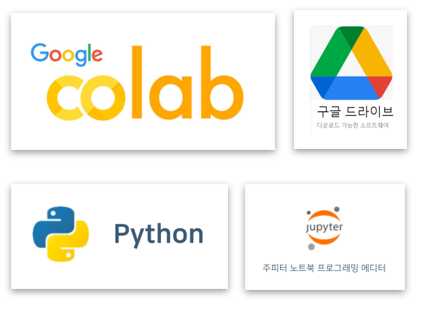

## B. 폴더생성 및 로그파일 준비 **



---
[준비작업 1] - 최초 1회만 준비
1. 우선, Google Drive 에 로그분석을 진행 할 폴더인 deepracer 를 생성합니다.

2. 위에서 생성한 deepracer 폴더 내에 tracks 폴더를 업로드 합니다. tracks 폴더 내에는 시뮬레이션 트랙의 waypoints 좌표가 npy 형식으로 저장되어 있습니다.  
(tracks 폴더는 https://github.com/aws-samples/aws-deepracer-workshops/tree/master/log-analysis/tracks 에서 다운받을 수 있습니다.)

3. 위에서 생성한 deepracer 폴더 내에 log_analysis 폴더를 생성합니다.  

---
[준비작업 2] - 분석할 때 마다 작업

4. log_analysis 폴더 내에 로그 분석을 진행할 모델의 폴더를 생성합니다. 이 실습에서는 model01 라는 이름의 폴더를 생성하겠습니다.

5. AWS Deepracer 콘솔창에 들어가 models 메뉴에서 로그분석을 진행할 모델을 클릭합니다. 그리고 Training 우측에 있는 Download logs 버튼을 눌러 로그 데이터를 다운받습니다.

6. 5에서 다운받은 파일을 압축을 풉니다. 압축을 풀고 sim-trace 폴더 내의 training 폴더 내의 training-simtrace 폴더를 찾습니다. training-simtrace 폴더를 4에서 생성한 로그 분석을 진행할 모델의 폴더인 model01 폴더에 업로드 합니다.  
(training-simtrace 폴더 내에는 모델이 training 하는 동안 기록 된 로그 기록들이 iteration 별로 csv 파일 형태로 저장되어있습니다.)

- 작업 공간 구조 시각화

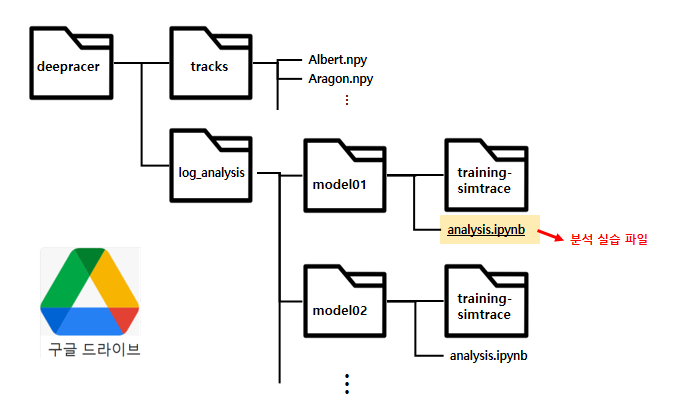

## C. 구글 드라이브 mount **


- Colab 좌측에 폴더모양을 누르면 Colab의 현재 작업 폴더를 확인할 수 있습니다.
- 아래와 같이 drive.mount('drive') 코드를 실행하면 Colab 작업 공간에 구글드라이브를 연동할 수 있습니다.
- 위와 같이 코드를 실행한 후 Colab 좌측에 폴더모양을 눌러보면 'drive/MyDrive' 폴더에 구글드라이브 최상위 디렉토리가 연동되었음을 볼 수 있습니다. 

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


## D. 경로 입력 **

**[경로 입력]**  
- root_path = '위에서 생성한 deepracer 폴더 경로'

- folder_name = 'log_analysis 폴더 내에 생성한 로그분석 폴더명'

- track_name = 'tracks 폴더 내에 있는 트랙 파일명'
> 이 실습에서는 The 2019 DeepRacer Championship Cup 트랙을 사용합니다.  
이 트랙의 파일명은 'reInvent2019_track.npy' 입니다.

In [ ]:
# deepracer 루트 경로 입력
root_path = '/content/drive/MyDrive/deepracer'

# 로그분석 폴더명 입력
folder_name = 'Test1-clone'

# 트랙 파일명 입력
track_file_name = 'reInvent2019_track.npy'   # The 2019 DeepRacer Championship Cup

In [ ]:
import os

# 트랙 폴더
track_path = os.path.join(root_path, 'tracks')

# 트랙 파일
track_file_path = os.path.join(root_path, 'tracks', track_file_name)

# 로그 폴더
log_path = os.path.join(root_path, 'log_analysis', folder_name, 'training-simtrace')


print('트랙 폴더 : ', track_path)
print('트랙 파일 : ', track_file_path)
print('로그 폴더 : ', log_path)

트랙 폴더 :  /content/drive/MyDrive/deepracer/tracks
트랙 파일 :  /content/drive/MyDrive/deepracer/tracks/reInvent2019_track.npy
로그 폴더 :  /content/drive/MyDrive/deepracer/log_analysis/Test1-clone/training-simtrace


## E. 라이브러리

- os : OS 제어
- math : 수식 계산
- pandas : 엑셀처럼 테이블 구조의 데이터 핸들링
- numpy : 수식 및 행렬 등의 고차원 수식 처리
- matplotlib : 시각화 기능

In [ ]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## F. tracks 불러오기

- Track 폴더 내 목록 보기

In [ ]:
track_list = os.listdir(track_path)
track_list.sort()
df_track_list = pd.DataFrame({'track_name' : track_list})
df_track_list

,track_name
0,AWS_track.npy
1,Albert.npy
2,AmericasGeneratedInclStart.npy
3,Aragon.npy
4,Austin.npy
5,Belille.npy
6,Bowtie_track.npy
7,Canada_Eval.npy
8,Canada_Training.npy
9,China_eval_track.npy


- 전체 Track 시각화

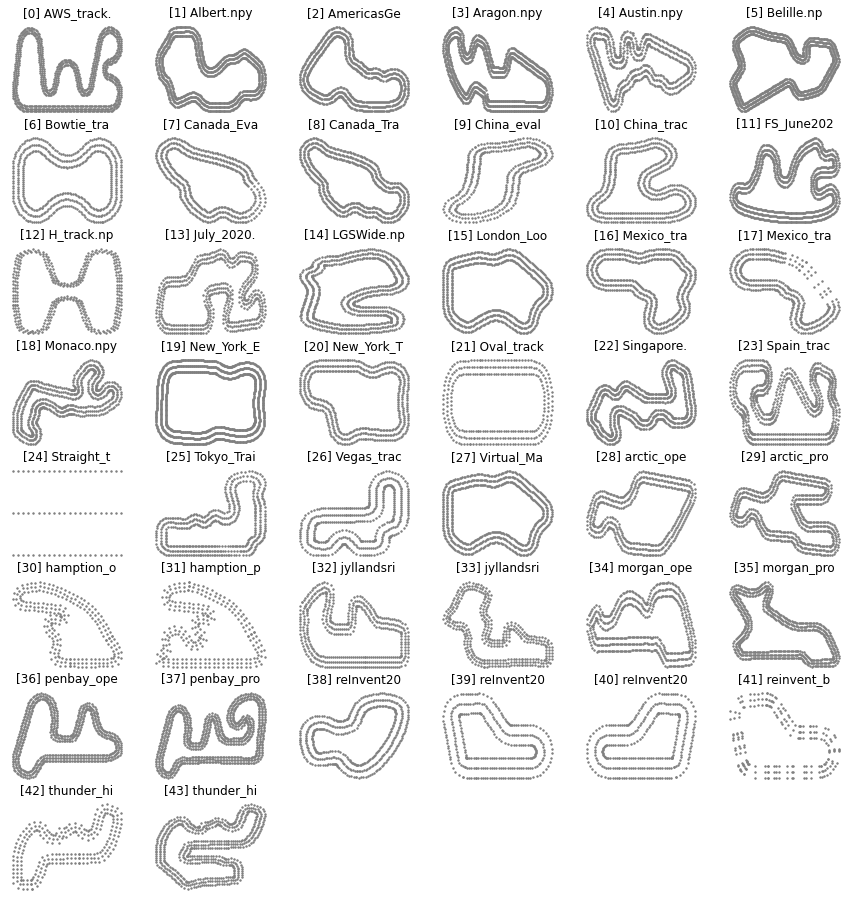

In [ ]:
track_list = sorted(os.listdir(track_path))  # 트랙 리스트 정렬
c_len = 6    # 가로 개수
r_len = math.ceil(len(track_list) / c_len)  # 세로 개수

# 시각화
plt.figure(figsize = (15,2*r_len))
for i, track in enumerate(track_list) :
    plt.subplot(r_len, c_len, i+1)
    plt.title(f"[{i}] {track[:10]}")
    plt.axis('off')
    target_arr = np.load(os.path.join(track_path, track))
    target_C = target_arr[:,[0,1]]
    target_L = target_arr[:,[2,3]]
    target_R = target_arr[:,[4,5]]

    plt.scatter(target_C[:,0],target_C[:,1], c = 'gray', s = 2)
    plt.scatter(target_L[:,0],target_L[:,1], c = 'gray', s = 2)
    plt.scatter(target_R[:,0],target_R[:,1], c = 'gray', s = 2)
    
plt.show()

- 선택한 트랙 시각화

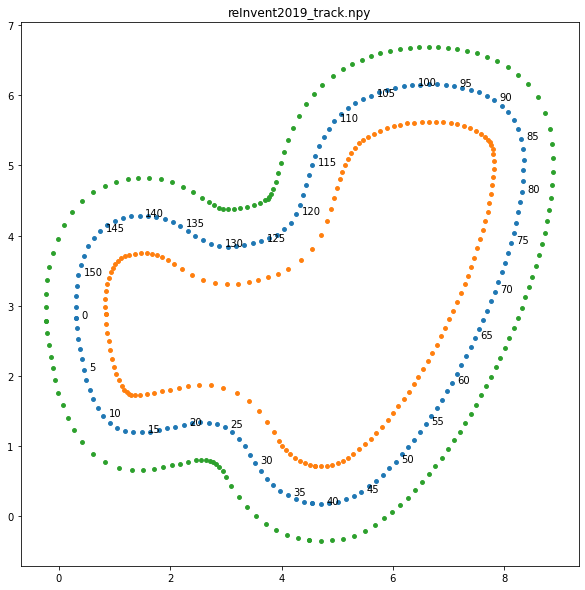

In [ ]:
# 트랙 waypoint 가져오기
track_arr = np.load(os.path.join(track_path, track_file_name))
track_C = track_arr[:,[0,1]]  # 트랙 중심 좌표
track_L = track_arr[:,[2,3]]  # 트랙 좌측 좌표
track_R = track_arr[:,[4,5]]  # 트랙 우측 좌표

# 시각화
plt.figure(figsize = (10,10))
plt.scatter(track_C[:,0],track_C[:,1], s = 15)
plt.scatter(track_L[:,0],track_L[:,1], s = 15)
plt.scatter(track_R[:,0],track_R[:,1], s = 15)

# index 표시
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10)

# 출력
plt.title(track_file_name)
plt.show()

# ======== 2. 로그 분석 ========

## A. 모델 설명 및 Console 결과 **

### A1. Console 화면 **


**[Training 화면 구성]**
1. 용어 및 의미
- Episode 는 게임 한 판을 의미합니다. 예를들어 트랙 밖을 벗어나거나 완주를 하게 되면 한 Episode 가 끝이 납니다.

- 만약 트랙 밖을 벗어나서 Episode 가 끝이 나면 트랙 밖을 벗어난 근처 지점으로 차량을 이동하여 다시 Episode를 진행합니다.

- Iteration 은 Episode 의 집합입니다. Episode를 몇개씩 한 묶음으로 할 지는 훈련 전에 미리 지정하는 하이퍼파라미터입니다. 

- 한 Iteration 이 시작되면 차량은 다시 출발선에서 훈련을 시작합니다.

- 한 Iteration 이 끝나면 Policy 의 업데이트가 진행됩니다.

- 그리고 한 Iteration 이 끝나면 Evaluating (평가) 가 진행됩니다. Evaluating에서는 Episode 를 3번을 진행합니다.
---

2. 좌측 그래프

- Training 창의 좌측에서 훈련 과정 기록을 Graph 형태로 볼 수 있습니다. X축은 Iteration 이고  y축은 좌측(Reward의 합)과 우측(완주율) 두가지로 구성되어 있습니다.

- 초록색 그래프는 Training(훈련) 과정에서 Iteration 에 속하는 Epoisode의 Reward 합을 평균을 내어 나타낸 그래프입니다. y축은 좌측에 해당됩니다. 좌측 y축의 범위는 보상의 범위에 따라 스케일이 바뀝니다.

- 파란색과 빨간색 그래프는 각각 Training(훈련)과 Evaluating (평가) 과정에서 Iteration 에 속하는 Episode 의 완주율의 평균을 나타낸 그래프입니다. y축은 우측에 해당됩니다. 우측 y축의 범위는 항상 0에서 100 사이입니다.
---

3. 우측 및 하단

- 우측 Simulation video stream 에서 Training (훈련) 또는 Evaluating (평가) 과정을 영상으로 확인할 수 있습니다. 
- 영상은 저장되지 않으며 훈련이 끝나면 영상을 다시 볼 수 없습니다.
- 하단에는 훈련이 경과된 시간을 볼 수 있습니다.

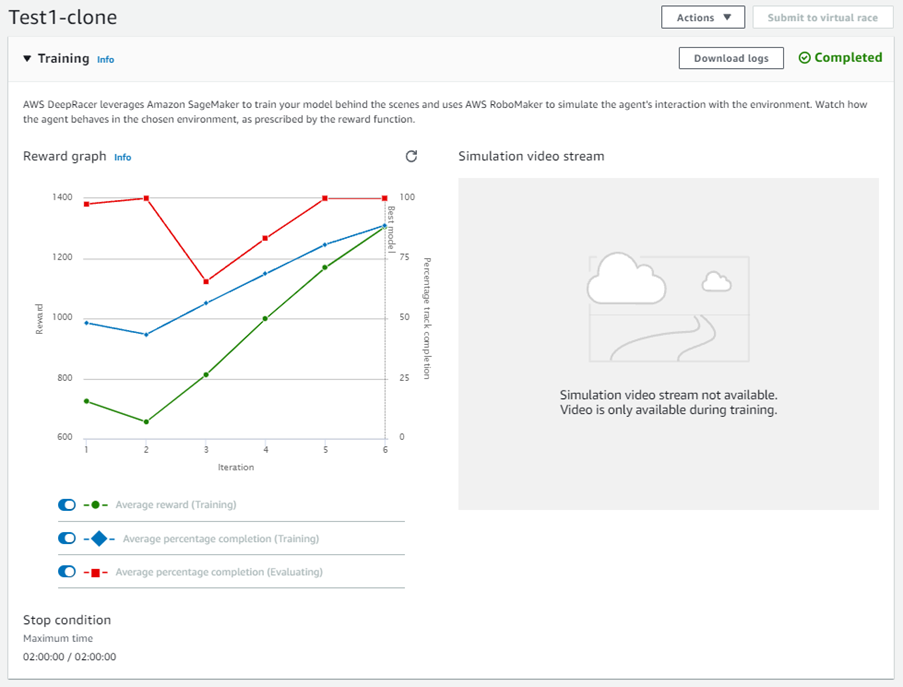

**[Reward Graph 해석]**  
- 정상적인 훈련이라면 초록, 파랑, 빨강 세 그래프는 (값은 달라도) 같은 추세를 따라야 합니다. 즉, 세 그래프가 함께 증가하거나 함께 감소하는것이 일반적입니다.
- 만약 세 그래프의 추세가 일관성이 없다면 훈련 과정이 정상적이라고 볼 수 없습니다. 즉, 하이퍼파라미터 또는 보상 함수등을 수정해야 합니다.
- 만약 세 그래프가 상승 추세에서 훈련이 끝났다면 훈련시간을 늘려 볼 필요가 있습니다.
- 만약 파랑 또는 빨강 그래프가 일찍 100에 도달하였다면 매우 빠르게 학습이 진행된 것입니다. 하지만 이 그래프는 완주율과 보상만 표시하므로 속도에 대한 정보는 해석하기 어렵습니다. 
- 완주율이 100에 도달하지 못한 채로 세 그래프가 더이상 상승을 하지 않는다면 훈련이 잘 되었다고 볼 수 없습니다. 완주율 100에 도달하지 못한채 사실상 학습에 진전이 없는 것이기 때문입니다.
- 강화학습은 일반적으로 불안정하기 마련입니다. 따라서 그래프가 진동하는 것이 일반적이지만 이것이 지나치다면 탐험율 또는 학습율 등의 하이퍼파라미터를 조정해 볼 필요가 있습니다.

**[Evaluation 화면 구성]**

- 훈련이 끝난 후 최종 평가를 진행하는 곳입니다.

- 3번의 episode 를 진행하며 episode 가 끝나면 다시 출발선에서 부터 다음 episode 가 시작됩니다.

- Training 창에서와 달리 완주 시간에 대한 정보를 볼 수 있습니다. 따라서 속도 및 시간에 대한 정보를 얻고자 한다면 Training 이 아닌 Evaluation 창을 활용해야 합니다.

- Training 창에서와 마찬가지로 Evaluation 에서도 영상을 볼 수 있습니다.


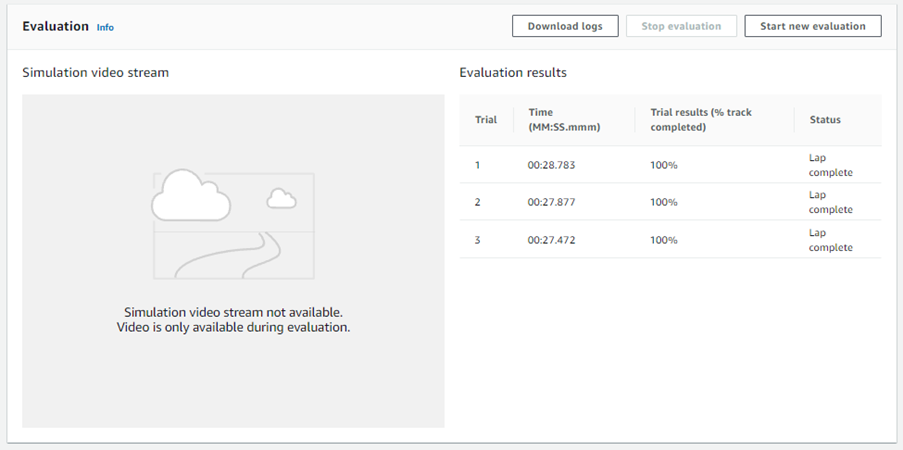

**[Training configuration]**
- 하이퍼파라미터, 에이전트 및 환경 등에 대한 정보를 볼 수 있습니다.

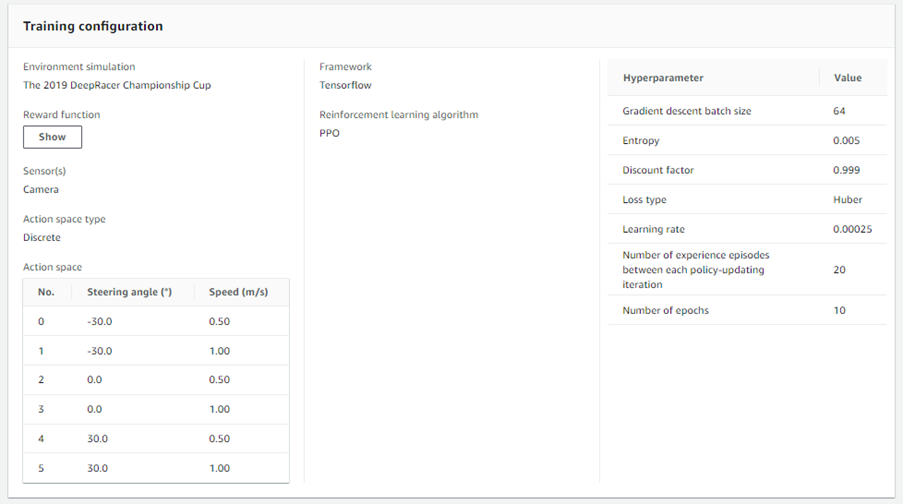

**[Reward Function]**

In [ ]:
import math

def reward_function(params):
    '''
    Example of rewarding the agent to follow center line
    '''
    
    ############### [reward1] all_wheels_on_track ###############
    all_wheels_on_track = params['all_wheels_on_track']
    
    if all_wheels_on_track:
        reward1 = 1
    else :
        reward1 = 0.5
      
        
        
    ############### [reward2] speed ###############
    speed = params['speed']
    
    if speed > 3 :
        reward2 = 1
    elif speed > 2 :
        reward2 = 0.8
    elif speed > 1 :
        reward2 = 0.6
    else :
        reward2 = 0.4
            
            
            
    ############### [reward3] distance_center ###############
    distance_from_center = params['distance_from_center']
    track_width = params['track_width']
    
    if distance_from_center < 0.1 * track_width :
        reward3 = 1
    elif distance_from_center < 0.5 * track_width :
        reward3 = 0.5
    else :
        reward3 = 0.2
        
        
        
    ############### [reward4] steering_angle ###############
    abs_streering_angle = abs(params['steering_angle'])
    
    if abs_streering_angle < 5 :
        reward4 = 1
    elif abs_streering_angle < 15 :
        reward4 = 0.9
    else :
        reward4 = 0.3
        
        
        
    ############### [reward5] direction_diff ###############
    waypoints = params['waypoints']
    closest_waypoints = params['closest_waypoints']
    heading = params['heading']
    
    # 현재 에이전트와 가장 가까운 waypoints의 위치를 가져옵니다.
    next_point = waypoints[closest_waypoints[1]]
    prev_point = waypoints[closest_waypoints[0]]
    
    # track_direction 을 계산
    track_direction =  math.atan2(next_point[1] - prev_point[1], next_point[0] - prev_point[0])
    track_direction = math.degrees(track_direction)
    
    # 각의 차이(direction_diff) 계산
    direction_diff = abs(track_direction - heading)
    if direction_diff> 180 :
        direction_diff = 360 - direction_diff
        
    # 보상 결정
    if direction_diff < 10 :
        reward5 = 1
    elif direction_diff < 30 :
        reward5 = 0.8
    else :
        reward5 = 0.5
        
        
        
    ############### [final reward] ###############
    reward = reward1 + reward2 + reward3 + reward4 + reward5
    
    return float(reward)

### A2. video stream 에서 보인 특징 **

- 훈련 또는 평가하는 장면을 video stream 으로 볼 수 있습니다.
- video stream 에서 특별하거나 특이한점이 보였다면 이곳에 서술하세요.
- 만약 video stream 을 시청하지 못하였다면 서술하지 않아도 괜찮습니다.  
  (video stream 기록은 저장되지 않으므로 다시보기가 불가능합니다)

1. 커브 구간에서 학습이 잘 안된다
2. 직진 구간에서 지나치게 속도를 줄인다
3. 드리프트 현상이 많이 일어난다
4. 전반적으로 속도가 너무 느리다
5. 커브 구간에서 계속 직진해 트랙을 벗어난다.

### A3. 모델의 특징 및 차별성 **

- 이 부분은 여러분이 만든 모델의 차별성을 설명하는 섹션입니다.
- 보상함수 또는 하이퍼파라미터에 본인만의 차별성과 창의성이 있다면 꼭 설명해주세요. 가산점이 부여됩니다.

1. 속도보다 안전성에 중점을 두고 보상을 주었다.
2. 값이 잘 수렴되게 하기 위해 학습율(Learning rate)을 0.00025로 낮췄다.
3. 지나친 탐험을 피하기 위해 Entropy를 0.005로 낮췄다.
4. 보상을 크게 주기 위해 Discount factor를 0.999로 높혔다. 
4. 이산행동 공간으로 구현하였으며 행동의 경우의 수를 총 6개로 최대한 작게 만들었다.

## B. 로그 파일 불러오기

- 경로 내 파일 목록 보기

In [ ]:
# 폴더 내에 로그 파일 목록 가져오기
file_names = os.listdir(log_path)

# 데이터 프레임으로 변형
df_file_name = pd.DataFrame()
df_file_name['file_name'] = file_names

# 정렬
df_file_name['iter'] = pd.Series(file_names).apply(lambda x : x.split('-')[0]).astype('int')
df_file_name = df_file_name.sort_values(by='iter').reset_index(drop = True)

print(df_file_name)

         file_name  iter
0  0-iteration.csv     0
1  1-iteration.csv     1
2  2-iteration.csv     2
3  3-iteration.csv     3
4  4-iteration.csv     4
5  5-iteration.csv     5


- 로그 파일 불러오기

In [ ]:
# 데이터 테이블로 정리하기
data_list = []
df_data = pd.DataFrame()
for i, file_name in enumerate(df_file_name['file_name']) :
    f = open(os.path.join(log_path, file_name), mode = 'r')
    text = f.read()
    f.close()

    # action 이 리스트형으로 되어 있는 경우 콤마(,)가 포함되어 있어서 제대로 읽어오지 못함. 이것을 전처리
    if '[' in text :
        text = text.replace('[','')
        text = text.replace(']','')
        text = text.replace('action', 'action_1,action_2')

    # dataframe 으로 변환
    text_lines = text.split('\n')
    text_list = [text_line.split(',') for text_line in text_lines]
    df = pd.DataFrame(text_list[1:], columns = text_list[0])
    df.dropna(inplace = True)

    # 자료형 변환
    float_col = df.columns[~ df.columns.isin(['episode_status', 'done',	'all_wheels_on_track'])]
    int_col = ['episode', 'steps', 'closest_waypoint']
    bool_col = ['done',	'all_wheels_on_track']
    df[float_col] = df[float_col].astype('float')
    df[int_col] = df[int_col].astype('int')
    df[bool_col] = df[bool_col].astype('bool')

    # iteration 행 삽입
    new_col = df.columns.insert(0,'iteration')
    df['iteration'] = i
    df = df[new_col]

    # 마무리
    data_list.append(df)
    df_data = df_data.append(df)

# 인덱스 정리
df_data.reset_index(inplace = True, drop = True)

df_data

,iteration,episode,steps,X,Y,yaw,steer,throttle,action,reward,done,all_wheels_on_track,progress,closest_waypoint,track_len,tstamp,episode_status,pause_duration
0,0,0,1,0.322511,2.691229,-84.004881,-30.0,0.5,0.0,0.0,True,True,0.606208,1,23.118222,17.794,prepare,0.0
1,0,0,2,0.322497,2.691373,-84.006075,0.0,1.0,3.0,4.4,True,True,0.605583,1,23.118222,17.859,in_progress,0.0
2,0,0,3,0.323367,2.681415,-84.062321,-30.0,1.0,1.0,3.7,True,True,0.648815,1,23.118222,17.926,in_progress,0.0
3,0,0,4,0.324289,2.658185,-84.459905,-30.0,1.0,1.0,3.7,True,True,0.748833,1,23.118222,17.981,in_progress,0.0
4,0,0,5,0.323022,2.618258,-85.755122,30.0,1.0,5.0,3.7,True,True,0.919040,1,23.118222,18.059,in_progress,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32558,5,119,418,0.912714,3.889171,-145.476079,0.0,1.0,3.0,3.9,True,True,98.881349,145,23.118222,2840.124,in_progress,0.0
32559,5,119,419,0.877543,3.850140,-142.603025,30.0,0.5,4.0,3.2,True,True,99.273742,145,23.118222,2840.189,in_progress,0.0
32560,5,119,420,0.847387,3.812605,-139.914780,30.0,1.0,5.0,3.2,True,True,99.479052,146,23.118222,2840.259,in_progress,0.0
32561,5,119,421,0.818775,3.770669,-136.711677,30.0,0.5,4.0,3.2,True,True,99.880351,146,23.118222,2840.324,in_progress,0.0


**[주요 변수 설명]**
- iteration : episode의 집합.
- episode : step 의 집합
- step : episode 의 순서
- X : 차량의 x좌표
- Y : 차량의 y좌표
- yaw : 차량의 정면 각도 ( = heading)
- steer : 차량 핸들 각도
- throttle : 차량 속도 ( = speed)
- action : 행동  
> 이산공간의 경우 행동의 index 가 표시되고 연속공간의 경우 차량의 핸들 각도와 속도가 각각 action_1, action_2 로 나누어 표시됨
- reward : 현재 step 에서 받은 보상
- all_wheels_on_track : 차량의 네 바퀴가 트랙 안에 위치하는지 여부
- progress : 현재 Epiosde 에서 완주율
- closest_waypoint : 가장 가까운 waypoint
- tstamp : 훈련이 진행된 총 시간

## C. episode 분석

- 데이터 그룹화

In [ ]:
# 에피소드 별로 데이터를 그룹화
df_groupby_episode = df_data.groupby('episode')

### C1. episode vs 완주율

**[episode 에 따른 완주율]**
- 에피소드가 진행됨에 따라 완주율이 높아지는 것이 좋습니다.
- s 자 형태로 완주율 최대치에 도달하는 것이 가장 이상적이라 볼 수 있습니다.

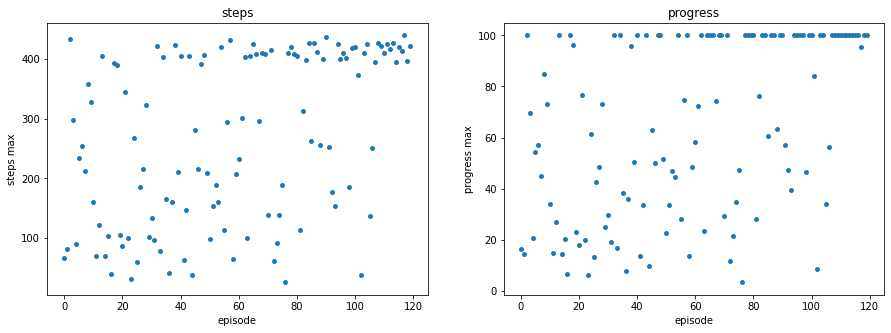

In [ ]:
# 시각화
plt.figure(figsize = (15,5))

# step 계산
step_max = df_groupby_episode.max()['steps']

# step 시각화
plt.subplot(1,2,1)
plt.scatter(x = step_max.index, y = step_max, s = 15)
plt.title('steps')
plt.xlabel('episode')
plt.ylabel('steps max')

# progress 계산
progress_max = df_groupby_episode.max()['progress']

# progress 시각화
plt.subplot(1,2,2)
plt.scatter(x = progress_max.index, y = progress_max, s = 15)
plt.title('progress')
plt.xlabel('episode')
plt.ylabel('progress max')

plt.show()

### C2. episode vs reward

**[episode 에 따른 보상의 합]**
- 에피소드가 진행됨에 따라 보상의 합이 높아지는 것이 좋습니다.
- 완주율과 함께 S 자 형태로 수렴하는 것이 이상적이라 볼 수 있습니다.

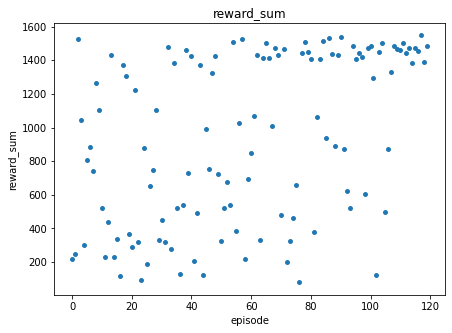

In [ ]:
# reward_sum 계산
reward_sum = df_groupby_episode.sum()['reward']

# 시각화
plt.figure(figsize = (7,5))
plt.scatter(x = reward_sum.index, y = reward_sum, s = 15)
plt.title('reward_sum')
plt.xlabel('episode')
plt.ylabel('reward_sum')
plt.show()

## D. reward 기능 분석

### D1. 속도

**[속도에 따른 보상의 분포]**
- 속도가 높아질 수록 보상도 함께 증가하는 것이 이상적이라 볼 수 있습니다.
- 즉, / (슬래시) 형태의 증가하는 형태의 분포가 이상적입니다.

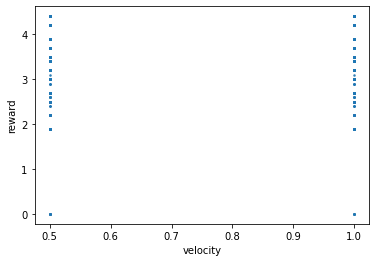

In [ ]:
# 시각화
plt.scatter(x = df_data['throttle'], y = df_data['reward'], alpha = 0.1, s = 2)
plt.xlabel('velocity')
plt.ylabel('reward')
plt.show()

### D2. 조향

**[핸들 각도에 따른 보상의 분포]**
- 핸들 각도가 0에 가까울 수록 (즉, 정면을 바라볼 수록) 보상이 높아지는 것이 이상적이라 볼 수 있습니다.
- 즉 ㅅ(시옷) 형태의 분포가 이상적입니다.

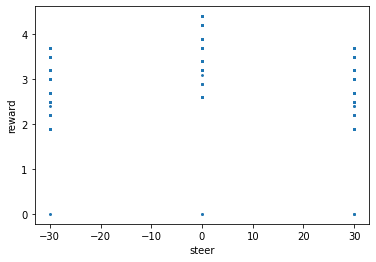

In [ ]:
# 시각화
plt.scatter(x = df_data['steer'], y = df_data['reward'], alpha = 0.1, s = 2)
plt.xlabel('steer')
plt.ylabel('reward')
plt.show()

### D3. distance_from_center

**[중심으로부터 거리에 따른 보상의 분포]**
- 중심으로부터 거리가 0에 가까울 수록 보상이 높아지는 것이 이상적이라 볼 수 있습니다.
- 즉, 감소하는 형태의 그래프가 이상적입니다.

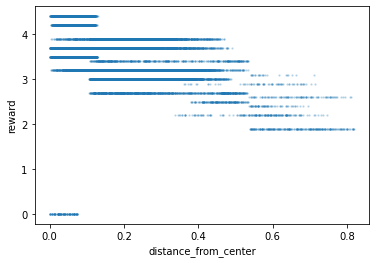

In [ ]:
# waypoint 중심 좌표 가져오기
x_center = df_data['closest_waypoint'].apply(lambda x: track_C[x,0])
y_center = df_data['closest_waypoint'].apply(lambda x: track_C[x,1])

# 중심으로 부터의 거리 계산
distance_from_center = ((df_data['X'] - x_center)**2 + (df_data['Y'] - y_center)**2)**(1/2)

# 시각화
plt.scatter(distance_from_center, df_data['reward'], alpha = 0.2, s = 2)
plt.xlabel('distance_from_center')
plt.ylabel('reward')
plt.show()

## E. 분포 조사

### E1. 행동 분포

- 종 모양 또는 고르게 분포하는 경우가 이상적입니다.

Text(0.5, 1.0, 'throttle')

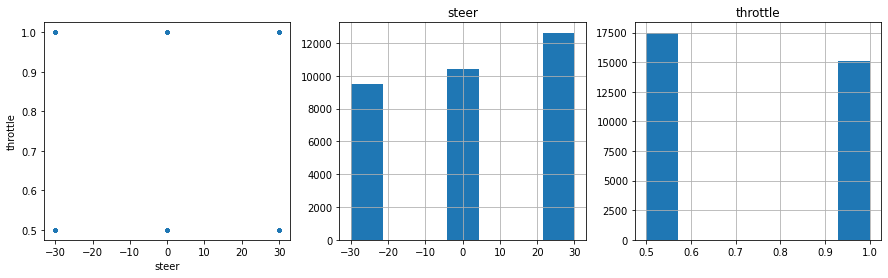

In [ ]:
# 이미지 크기 지정
plt.figure(figsize = (15,4))

# 행동 분포 scatter
plt.subplot(1,3,1)
plt.scatter(x = df_data['steer'], y = df_data['throttle'], alpha = 0.1, s = 10)
plt.xlabel('steer')
plt.ylabel('throttle')

# 핸들 행동 histogram
plt.subplot(1,3,2)
df_data['steer'].hist(bins = 7)
plt.title('steer')

# 속도 행동 histogram
plt.subplot(1,3,3)
df_data['throttle'].hist(bins = 7)
plt.title('throttle')

### E2. reward 분포

- reward 분포는 종 모양을 띄는 것이 이상적입니다.

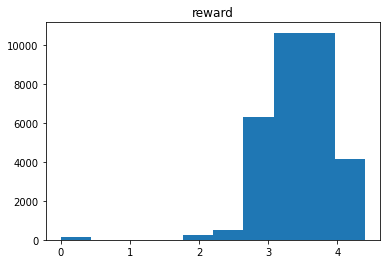

In [ ]:
# 시각화
plt.hist(df_data['reward'], bins = 10)  # 10개 구간
plt.title('reward')
plt.show()

## F. 자취 시각화

### F1. 위치

**[자취 분포 시각화]**

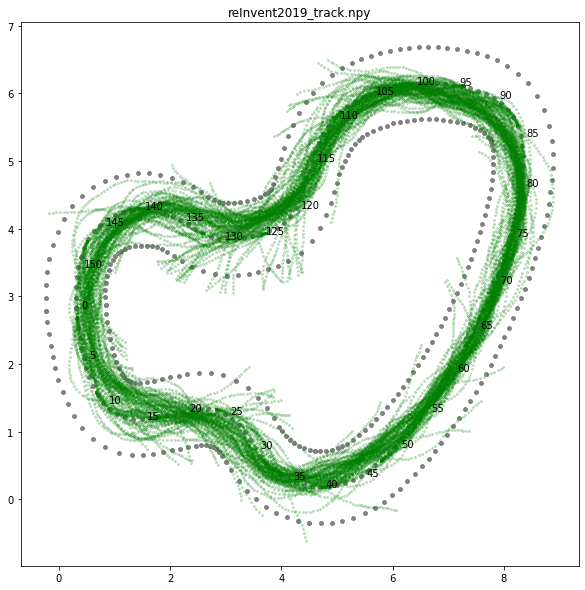

In [ ]:
# 트랙 시각화
plt.figure(figsize = (10,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15, )
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10)

# 로그 자취 시각화
plt.scatter(x = df_data['X'], y = df_data['Y'], c = 'green', s = 4, alpha = 0.2)

# 출력
plt.title(track_file_name)
plt.show()

### F2. 속도

**[속도 분포 시각화]**

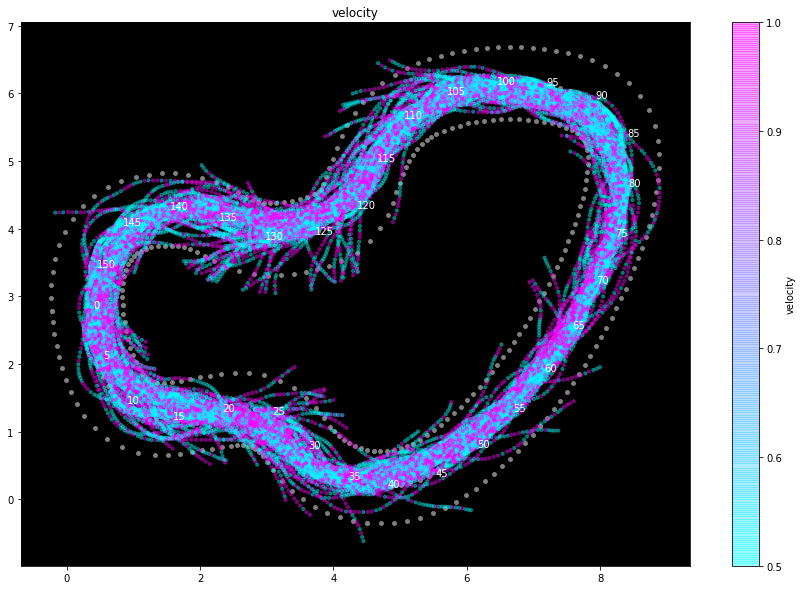

In [ ]:
# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15)
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 자취를 속도에 따라 색깔을 다르게 시각화
plt.scatter(x = df_data['X'], y = df_data['Y'], c = df_data['throttle'], s = 10, alpha = 0.4, cmap = plt.cm.cool)
plt.colorbar(label='velocity')

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10, c = 'white')

# 출력
plt.title('velocity')
plt.gca().set_facecolor('black')  # 배경색
plt.show()

### F3. reward

**[reward 분포 시각화]**

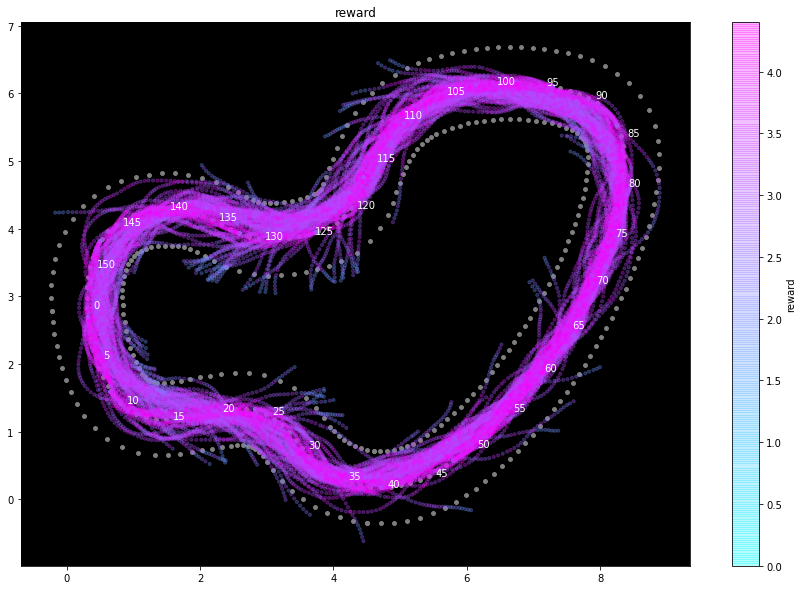

In [ ]:
# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15)
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 자취를 reward에 따라 색깔을 다르게 시각화
plt.scatter(x = df_data['X'], y = df_data['Y'], c = df_data['reward'], s = 10, alpha = 0.3, cmap = plt.cm.cool)
plt.colorbar(label='reward')

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10, c = 'white')

# 출력
plt.title('reward')
plt.gca().set_facecolor('black') # 배경색
plt.show()

### F4. 위험 구간

- 에피소드별 마지막 waypoint

In [ ]:
df_last_waypoint = df_data[['episode', 'closest_waypoint']].copy()
df_last_waypoint = df_last_waypoint[::-1]
df_last_waypoint = df_last_waypoint.drop_duplicates(subset = 'episode')
df_last_waypoint = df_last_waypoint.rename({'closest_waypoint':'last_waypoint'}, axis = 1)
df_last_waypoint = df_last_waypoint.reset_index(drop = True)
df_last_waypoint

,episode,last_waypoint
0,119,146
1,118,139
2,117,124
3,116,124
4,115,116
...,...,...
115,4,64
116,3,131
117,2,15
118,1,30


- 마지막 waypoint 개수

In [ ]:
df_dangerous = df_last_waypoint['last_waypoint'].value_counts()[::-1]
df_dangerous = df_dangerous.reset_index(name = 'count')
df_dangerous = df_dangerous.rename({'index':'waypoint'}, axis = 1)
df_dangerous

,waypoint,count
0,30,1
1,27,1
2,90,1
3,111,1
4,34,1
...,...,...
56,133,4
57,70,4
58,124,5
59,131,5


**[위험 구간 시각화]**

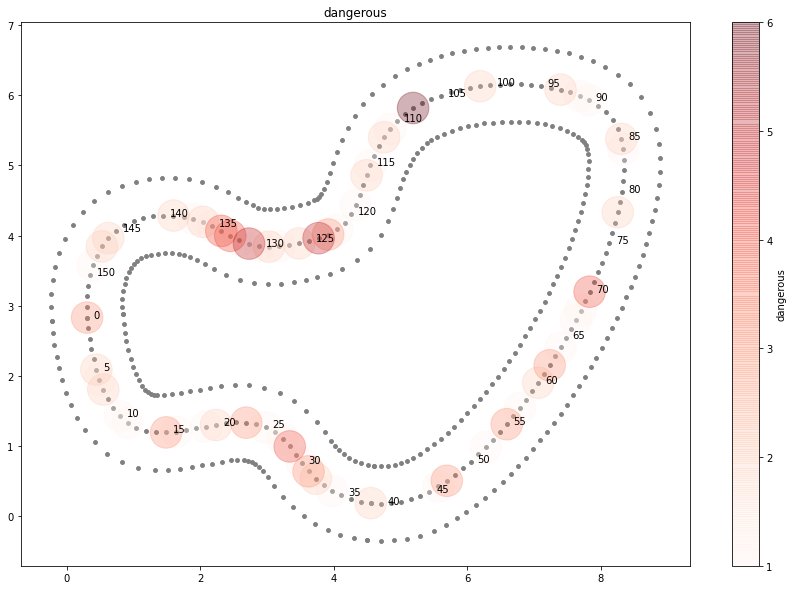

In [ ]:
# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15, )
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 위험 (이탈) 구간 좌표 가져오기
x_dan = df_dangerous['waypoint'].apply(lambda w : track_C[w][0])
y_dan = df_dangerous['waypoint'].apply(lambda w : track_C[w][1])

# 위험 (이탈) 구간을 이탈한 정도에 따라 색깔을 다르게 시각화
plt.scatter(x = x_dan, y = y_dan,  c = df_dangerous['count'], s = 1000, alpha = 0.3, cmap = plt.cm.Reds)
plt.colorbar(label='dangerous')

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10)

# 출력
plt.title('dangerous')
plt.show()

#### F4-1. 특정 구간 기록**

target_interval 변수에 본인이 시각화하고자 하는 구간을 입력

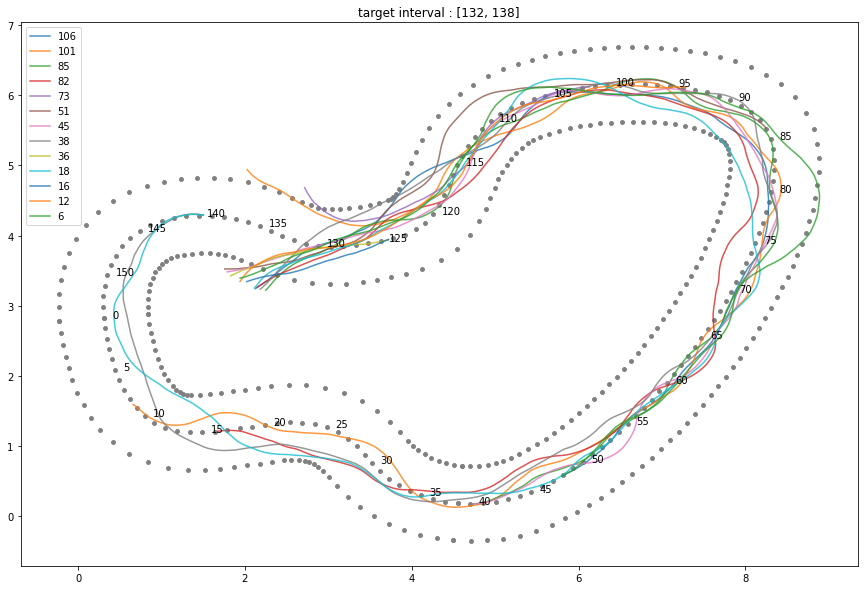

In [ ]:
# 시각화 하고자 하는 waypoint 구간 입력
target_interval = [132, 138]

# 입력한 구간 내에 해당되는 에피소드 가져오기
target_episode = df_last_waypoint['episode'][(target_interval[0] <= df_last_waypoint['last_waypoint']) & (df_last_waypoint['last_waypoint'] <= target_interval[1])]

# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15)
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 각 에피소드별로 트랙의 자취 시각화
for i in target_episode :
    df = df_data[df_data['episode'] == i]
    plt.plot(df['X'], df['Y'], alpha = 0.8, label = i)

# 범주 표시
plt.legend()

# waypoint index 표시
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10)

# 출력
plt.title(f'target interval : {target_interval}')
plt.show()

#### F4-2. 특정 구간 기록**

target_interval 변수에 본인이 시각화하고자 하는 구간을 입력

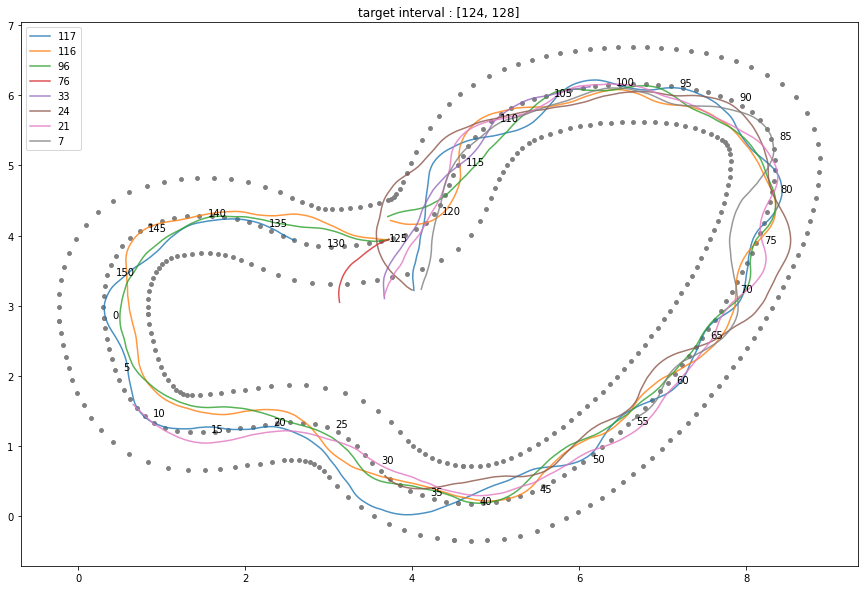

In [ ]:
# 시각화 하고자 하는 waypoint 구간 입력
target_interval = [124, 128]

# 입력한 구간 내에 해당되는 에피소드 가져오기
target_episode = df_last_waypoint['episode'][(target_interval[0] <= df_last_waypoint['last_waypoint']) & (df_last_waypoint['last_waypoint'] <= target_interval[1])]

# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15)
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 각 에피소드별로 트랙의 자취 시각화
for i in target_episode :
    df = df_data[df_data['episode'] == i]
    plt.plot(df['X'], df['Y'], alpha = 0.8, label = i)

# 범주 표시
plt.legend()

# waypoint index 표시
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10)

# 출력
plt.title(f'target interval : {target_interval}')
plt.show()

## G. 본인만의 분석 기법 **

- 이 부분은 위에서 소개된 분석 기법이 아닌 본인만의 분석기법을 구현하는 섹션입니다.
- 필수는 아니지만 만약 이 섹션 수행 할 경우 가산점이 부여됩니다.

# ======== 3. 분석 및 튜닝 ========

## A. 결과 분석 **

- 위에서 수행한 분석 내용을 토대로 본인의 분석 및 해석을 적는 섹션입니다.

1. 커브 구간에서 지나치게 핸들은 많이 꺾는 경향을 보인다. 따라서 다음 모델에서 핸들의 각도 범위를 좁히는 튜닝이 필요해 보인다.

2. 직진 구간에서 속도를 더 높일 필요가 있어 보인다. 따라서 속도에 따른 보상 값을 높이는 방향으로 튜닝이 필요해 보인다.

3. 안전성에 중점을 두어 속도 차이에 대한 보상을 비슷하게 설정했는데, 속도 차이에 대한 보상 차를 높이는 방향으로 튜닝이 필요해 보인다.

4. waypoint 구간 [124, 128] 에서 좌회전하여 이탈하는 경우가 많다. 이 구간에서 좌회전 시 보상을 받지 못하도록 튜닝이 필요해 보인다. 

5. waypoint 구간 [132, 138] 에서 좌회전하여 이탈하는 경우가 많다. 이 구간에서 좌회전 시 보상을 받지 못하도록 튜닝이 필요해 보인다. 

6. 완주율과 보상의 합이 상승하는 도중에 훈련이 끝났다. 훈련 시간을 더 늘려볼 필요가 있어보인다.

7. 불필요한 행동이 많아보인다. 탐험을 줄이고 학습율을 높여볼 필요가 있어보인다.

## B. 튜닝 계획 **

- 위에서 결과 분석을 토대로 튜닝 계획을 적는 섹션입니다.
- 아래에 튜닝 계획을 적고 새로운 모델에 적용해보세요.

### B1. 하이퍼파라미터 튜닝 **

1. 훈련시간 : 보상함수를 변경해 2시간씩 훈련을 시켜보고 훈련이 잘 되면 훈련을 늘리는 방향으로 수정

### B2. 보상 함수 튜닝 **

1. 속도차에 따른 보상의 차이가 높게 수정

2. closest_waypoints[0]이 121에서 126 사이일 때 에이전트를 오른쪽으로 가게 수정

3. closest_waypoints[0]이 130에서 140 사이일 때 에이전트를 오른쪽으로 가게 수정

